<a href="https://colab.research.google.com/github/edgeofchaos42/ComplexityExplorer/blob/main/Session_3_Initial_Model_and_Add_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Concept** Text fields will give a loose script and the the *talent* will type the the code as they are recording. In post production we can speed this part. If the audio is choppy we could even record the audio seperately. 

### 1- Install Mesa

Script Notes: 

To build Sugarscape first we need to get our environment set up. As operating systems are different this can cause a lot of variance and issues. So we will use Google Colab to ensure we all have the same environments. This does require a google account. If you have python and/or jupyter on you local machine you can do that as well but there may be some slight issues.

You can either search for colab or look in the assignments page for the link [colab here](https://colab.research.google.com/?utm_source=scs-index).  

Then we create a new notebook and we will name it Sugarscape

**Action** Create new notebook 

Although Jupyter is awesome it is not the best choice if you continue to create ABMs. If you are new Python there are a lot of integrated devleopment environments you can install on your computer that can make coding easier. 

In the assignments page is a link to an [overview from Real Python](https://realpython.com/python-ides-code-editors-guide/#:~:text=An%20IDE%20(or%20Integrated%20Development,syntax%20highlighting%20and%20auto%2Dcompletion) about IDEs

*Not sure how to share this will ask Leah*

Mesa is not a standard install for Colab so first we need to install it

**ACTION** Write code install line



In [1]:
!pip install mesa

     |████████████████████████████████| 691 kB 4.7 MB/s 
     |████████████████████████████████| 64 kB 1.5 MB/s 


## 2a - Upload the terrain

Script Notes: 

The first thing we want to do is load the terrain from **GET LOCATION FOR STUDENTS TO DOWNLOAD**

This is a numpy or numerical python file. 

**ACTION**: Show how to load file

Now we want to get the data so we can put it in our model.

**Action**: Write code 

The file is a matrix of the sugar and spice values for each grid location on a cartesian plane. The data structure is list of lists. With 2 lists one for the sugar values and one for the spice values. Then each of those lists is then a list with 50 lists for each x location. and each x location list is 50 long for each y location. Where the location is detemrined by the index of the value based on its location.

You can see this structure with the numpy shape command, and numpy shape against the first list

**Action:** Show shape




In [12]:
#Action 1
import numpy as np


with open('SugarSpice.npy', 'rb') as f:
    land = np.load(f)

np.shape(land), np.shape(land[0]) # Action 2

((2, 50, 50), (50, 50))

## 2b - Show terrain

However visualizing the terrain is a more intutive way to ensure we have the sugar spice hills we need. To do this is fairly simple, first we import a plotting library in this case matplotlib which we want to show inline

**Action 1**: import matplotlib and plot inline

then we run the imshow function to plot it. imshow is a little odd in that it puts the origin in the upper left, so we will add the lower key word argument or kwarg to put back in the lower left. 

Now that we have verified our our landscpae we can start putting it into our model



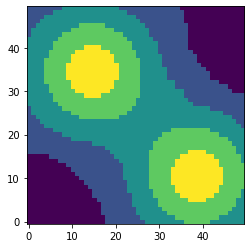

In [13]:
import matplotlib.pyplot as plt # action 1
%matplotlib inline 

plt.imshow(land[0], origin="lower") #Action 2, do 0 and then 1

## 3a - agentize the Landscape 

  Next we are going to convert this landscape into the agents which will provide sugar and spice so our traders can survive and trade 

  First we want to import the mesa components to to build a model and agent. 

  **ACTION** Do Import

  **NOTE** Will update for new namespace

In [5]:
from mesa import Agent, Model
from mesa.space import MultiGrid

## 3b - agentize the Landscape 

  Second we want to build our sugar and spice agents. Each resource agent will be a python object. To create these agents we will create the ResourceAgent class and we will inherit the Agent class from mesa so critical functionality like leveraging the step function is already taken care of 

  **ACTION 1** Write class 

  Then we want to intiialize the class. The agent must have the unique-id parameter to mesa can manage all the agents and we will also add a pointer to the model (more on this later). As these attributes are part of mesa we can use Python's super_init function to inherit them. 
  
  **Action 2** Start init

  As their ID is also their location on the grid since they cannot move we will also add the position attribute
  
  **Action 3** add position

  Next we will add the agent attributes. In this case how much sugar the agent has and how much spice.

  

In [6]:
class ResourceAgent(Agent): # Action 1 
    
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model) #Action 2
        self.pos = unique_id #Action 3

## 3c - agentize the Landscape 

*NOTE: Don't make new cells just run the cell and then do the below in the same cell!!!*

  unique_id and model are common for all mesa models so you will see this code again when we build our trader agents. 

  for the resource agents however, we want to pass in their sugar and spice values so we will add the sugar and spice attributes, but numerous different approaches could achieve this outcome.

  **Action 1** Add parameter

If we remember from our upload of the landscape the data structure is a matrix or list of lists with the first list being the sugar value and the second list being the spice values. This will tell us how to take the information from the list and transform it to an agent attribute. As the traders harvest, consume and trade these raw materials we actually need to create five attributes - 

First lets add the current value of the sugar and spice

**Action 2** : add value_sug, value_spice

Second, we need to use this same value to add the max value that resource agent can grow of its respective sugar and spice  resources

**Action 3** add max_sug and max_spice

Third, we need to add the rate at which the value regrows, there are numerous possibilites here. We could make it a parameter so we could run different variations of the model or pass in a distribution so each resource agents has a different regrow rate or whatever else you can imagine. In this case we will stick with 1 as that is what was in *Growing Artifical Societies*

**Action 4** Add regrow

Finally, a Python feature that will help us later is is we `type` our agent to be `resource` and we can also leverage Python private string attribute to make our coding easier as the model gets more complex

**Action 5** Add type and str

In [7]:
class ResourceAgent(Agent): # Action 1 
    
    def __init__(self, unique_id, model, sugar, spice): # Action 1
        super().__init__(unique_id, model) #Action 1
        self.pos = unique_id
        self.value_sug = sugar # Action 2
        self.value_spice = spice # Action 2
        self.max_sug = sugar # Action 3
        self.max_spice = spice #Action 3
        self.regrow = 1 # Action 4
        self.type = "resource" #Action 5
        
    def __str__(self): #Action 5
        return "Resource" #Action 5. 

## 3d create the model

Now that we have created the initial resource agent class using the npy file. We need to conect this class into the intiailization of a mesa model. 

To do this we will create another class class TraderScape. This class will be the main manager for the entire model. It will initialize all the agents and manage their interactions and their sequence of movements. This type of set up is standard for all mesa models. If you are using .py files these different cells would typically be different .py files.  

**Action 1**: Initial Traderscape

To initialize our model we will have four parameters, self per python convention, landscape to pass in the numpy file file. We will also add three attributes, the width which will be 50 per the npy file, the height, again it will be size 50 and finally the grid on which the location of the agent will be placed. To follow the principle of least surprise mesa models list width (or x axis) and then y (or y axis). The model will work if you do it the other way but keeping this convention will make model development easier. As resource agents and trader agents can be at the same location we will use Mesa's multigrid.

**Action 2** add width, height and multigrid

Now we want to create some code to convert the numpy array into the agent attributes, for this will use a for loop in a for loop. To iterate through the x values and then y values. Think of this as building stacks of blocks with x being the location of the stack and y being the height. We then build each stack to 50 before moving to the next stack of blocks. 

**Action 3** add x loop, add y loop


In [8]:
class TraderScape(Model): #Action 1

  def __init__(self,land): #Action 1
    
    self.width = 50 #Action 2
    self.height = 50 #Action 2
    self.grid = MultiGrid(self.width, self.height, torus=True)  #New  #Action 2

    #places resources from landscape on grid
    for x in range(50): #action 3
      for y in range(50): #action 3
        sugar = land[0][x][y] 
        spice = land[1][x][y]
        resource =  ResourceAgent((x,y),self,sugar,spice)
        #print(resource) # do first show how the string works #Action 3e 2
        print(resource.value_sug) #do second Action 3e 3
        self.grid.place_agent(resource, (x,y))

## 3e Initiallize the model

Now that we have the basic structure a resource agent and a mesa model we can initialize an instance of our model. 

**Action 1** Initialize model 

Well it ran without error but what happened. To show part of the model initialization we can add print statements. This will also show the `self.type` atrribute works

**Action 2**: add print resource to model --- then clear output

string function work

**Action 3** add string statement - then clear output


In [ ]:
#Test
TraderScape(land) #Notes: Run three time

This concludes session 3 in the next session we will add the trader agents into the model. 